In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from carga import *
from tratamentos import *

pfEnade = doCarga('microdados_enade_2019.txt')

# MOSTRAR - Head
# pfEnade.head()
# MOSTRAR - o tipo de dados
# pfEnade.info()

# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
# pfEnade.groupby("Tempo").count()
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
#pfEnade.groupby("Publica").count()
pfEnade = doHumanasExatas(pfEnade)
#pfEnade['Exatas'].value_counts()

# TRATAMENTOS - Dicionários
pfEnade = doRenda(pfEnade)
pfEnade['Renda'].value_counts().sort_index()
# pfEnade.isna().sum()    # Mostra se há vazios
pfEnade = doEscolaridade(pfEnade)

In [ ]:
# VISUALIZAR - Renda
pfEnade.filter(items=['QE_I08', 'RendaDesc']).groupby('RendaDesc').count() #.sort_values(by='QE_I08', ascending=False)
renda = pfEnade.filter(items=['QE_I08', 'RendaDesc']).groupby('RendaDesc').count() #.sort_values(by='QE_I08', ascending=False)
renda.plot()

In [ ]:
# TRATAR - BOXPLOT - Tempo - Retirar outliers
pfEnade = pfEnade.query('Tempo < 7')
# stats.skew(pfEnade.Tempo)   # Pearson
fig = px.box(pfEnade, y='Tempo')
fig.update_layout(width=500, height=500)
fig.show()

In [ ]:
# HISTOGRAMA - Renda
pfEnade['Renda'].hist(bins=5)

In [ ]:
# PERCENTUAL - Renda
distRenda = pfEnade['Renda'].value_counts()

percentRenda = [100*x/distRenda.sum() for x in distRenda]
percentRenda

In [ ]:
# PLOT - Comparativo de Reda
pfEnade.groupby('Renda').hist()

In [5]:
# PERCENTUAL - Escolaridade do Pai
distEscolaridade = pfEnade['EPai'].value_counts()

percentEscolaridade = [100*x/distEscolaridade.sum() for x in distEscolaridade]
percentEscolaridade

[35.16429370643728,
 22.10779432747878,
 16.675220957327777,
 15.398236447437306,
 6.301518215506534,
 4.352166459652833,
 0.000769886159499882]

In [4]:
pfEnade['EscolaridadeDesc']

0                                             Ensino Médio
1                              Ensino Superior - Graduação
2                              Ensino Superior - Graduação
3                                            Pós-graduação
5                              Ensino Superior - Graduação
                                ...                       
433925    Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série)
433926    Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série)
433927                         Ensino Superior - Graduação
433928    Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série)
433929    Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série)
Name: EscolaridadeDesc, Length: 389668, dtype: object

Renda
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
2    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
3    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
4    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
5    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
6    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
7    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

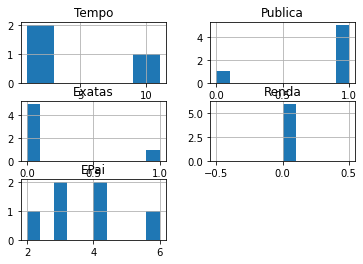

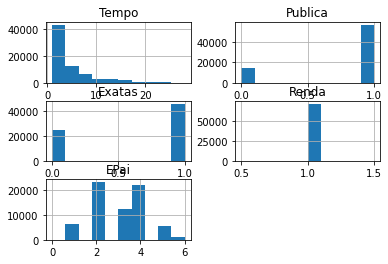

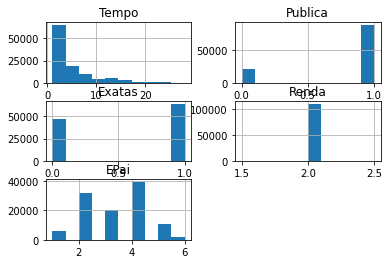

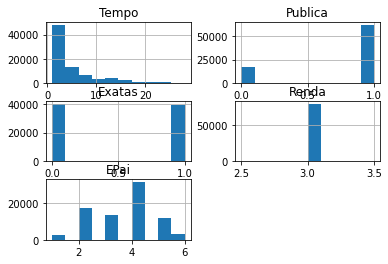

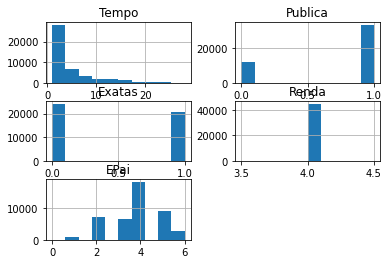

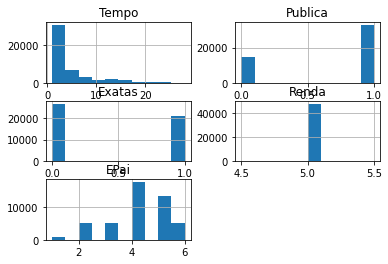

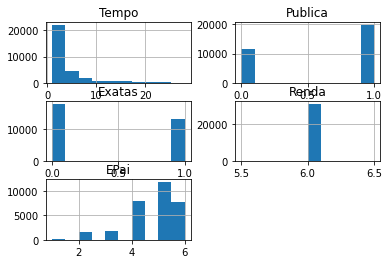

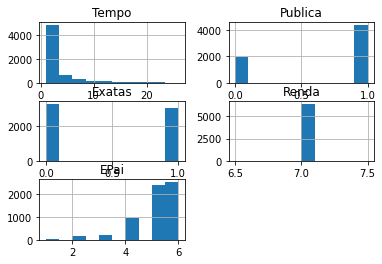

In [3]:
# PLOT - Comparativo de Escolaridade do Pai
pfEnade.groupby('Renda').hist()

In [ ]:
pfEnade.groupby('Renda').hist()

In [ ]:
pfEnade.plot.scatter('Publica','Renda')

In [ ]:
pfEnade.dtypes